In [1]:
import numpy as np   # numercal python. 수치 해석
import pandas as pd   # DataFrame을 쉽게 다루기

import matplotlib.pyplot as plt   # Data visualization
import seaborn as sns   # Data visualization
sns.set_style("whitegrid")   # Seaborn 스타일 설정
sns.set(font_scale = 2.0)   # seaborn 라이브러리 세팅 (plot의 모든 폰트 사이즈를 2.0로 지정)

import missingno as msno   # 데이터셋에 채워지지 않은 null 데이터를 쉽게 보여줄 수 있는 라이브러리

import warnings 
warnings.filterwarnings('ignore')   # ignore warning

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

ts = pd.read_csv('./fuel_index_2022_2024.csv', header=None)
ts.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98
0,NaN,PPXDK00,PUABC00,PUAFT00,AALMZ00,PUAFN00,AAYWT00,AARTG00,AARKD00,AARKE00,PUAFL00,POADG00,PUAER00,AAXYQ00,PUAFD00,PBABK00,PUAGQ00,AARKJ00,AAMNV00,AAWWV00,AAGPM00,AAWWY00,PBAAP00,AAWYR00,AAGPD00,AAWWX00,AAGQN00,AAWYB00,AAGQW00,AAWYC00,AAXJR00,AAWZF00,AAGSG00,AAWYL00,AAKAB00,AARSU00,PUAEV00,POACI00,PBABW00,PUAYR00,PBABX00,PUBAD00,AAXWI00,AARKK00,AAWYU00,PUAFI00,AAXYO00,AAXYR00,AAXYS00,PUAEO00,POABX00,PUAGX00,PUAGY00,AAXYT00,PUAET00,AAWZE00,AARJZ00,AAWYF00,POACF00,AAVUO00,AARSH00,PUAEE00,AARSI00,AAOVC00,ICLO001,ICLO002,AAXYP00,PUABE00,PUAXP00,AARSZ00,AAVWC00,AARTJ00,MFFMM00,MFCMM00,PUBFH00,PUBFH00,PUBFH00,PBADH00,PBADH00,PBADH00,PUAAZ00,PUAAZ00,PUAAZ00,AAVJI00,AAVJI00,AAVJI00,PUAAY00,PUAAY00,PUAAY00,AAVJJ00,AAVJJ00,AAVJJ00,AAYWS00,AAYWS00,AAYWS00,MFSAD00,AAXWO00,NaN,NaN
1,NaN,FO 380 CST 3.5%S FOB Spore Cargo,FO 3.5%S FOB Rdam Barge,Bunker FO 380 CST Dlvd Singapore,Marine Gasoil 0.5% Dlvd Singapore,Bunker FO 380 CST 3.5% Dlvd Rotterdam,Gasoil .1%S (1000ppm) FOB ARA Barge (NextGen MOC),Marine Gasoil 0.1% Dlvd Rotterdam,Bunker FO 380 CST Dlvd Shanghai,Marine Gasoil 0.5% Dlvd Shanghai,Bunker FO 380 CST 3.5% Dlvd Piraeus,Marine Gasoil 0.1% Dlvd Piraeus,Bunker FO 380 CST Dlvd Hong Kong,Low Sulfur Marine Gasoil 0.1% Dlvd Hong Kong,Bunker FO 380 CST 3.5% Ex-Wharf Genoa,Marine Gasoil 0.1% Ex-Wharf Genoa,Bunker FO 380 CST Dlvd Busan,Marine Gasoil 0.5% Dlvd Busan,Bunker FO 380 CST 3.5% Dlvd Charleston,Marine Gasoil 0.1% Dlvd Charleston,Bunker FO 380 CST 3.5% Dlvd Los Angeles,Marine Gasoil 0.1% Dlvd Los Angeles,Bunker FO 380 CST 3.5% Ex-Wharf Los Angeles,Marine Gasoil 0.1% Ex-Wharf Los Angeles,Bunker FO 380 CST 3.5% Dlvd Houston,Marine Gasoil 0.1% Dlvd Houston,Bunker FO 380 CST 3.5% Dlvd New York,Marine Gasoil 0.1% Dlvd New York,Bunker FO 380 CST 3.5% Dlvd Norfolk,Marine Gasoil 0.1% Dlvd Norfolk,Bunker FO 380 CST 3.5% Ex-Wharf Savannah,Marine Gasoil 0.1% Ex-Wharf Savannah,Bunker FO 380 CST 3.5% Dlvd Seattle,Marine Gasoil 0.1% Dlvd Seattle,Bunker FO 380 CST 3.5% Dlvd Gibraltar,Marine Gasoil 0.1% Dlvd Gibraltar,Bunker FO 380 CST Dlvd Japan,Marine Diesel 0.5% Dlvd Japan,Marine Gasoil 0.1% Dlvd El Callao,Bunker FO 380 CST 3.5% Dlvd Valparaiso,Marine Gasoil 0.1% Dlvd Valparaiso,Bunker FO 380 CST 3.5% Ex-Wharf Balboa,Marine Gasoil 0.1% Ex-Wharf Panama Canal,Marine Gasoil 0.5% Dlvd Colombo,Marine Gasoil 0.1% Ex-Wharf New York,Bunker FO 380 CST 3.5% Ex-Wharf New York,Low Sulfur Marine Gasoil 0.1% Dlvd Singapore,Low Sulfur Marine Gasoil 0.1% Dlvd Shanghai,Low Sulfur Marine Gasoil 0.1% Dlvd South Korea,Bunker FO 380 CST 3.5% Ex-Wharf French Med,Marine Gasoil 0.1% Ex-Wharf French Med,Bunker FO 180 CST 3.5% Dlvd Durban,Marine Gasoil Dlvd Durban,Low Sulfur Marine Diesel 0.1% Dlvd Tokyo Bay,Bunker FO 380 CST 3.5% Dlvd Istanbul,Marine Gasoil 0.1% Ex-Wharf San Francisco,Bunker FO 380 CST Dlvd West Japan,Marine Gasoil 0.1% Dlvd San Francisco,Marine Gasoil 0.1% Dlvd Istanbul,Bunker FO 500 CST Dlvd Singapore,Marine Gasoil 0.1% Dlvd Algeciras,Bunker FO 380 CST 3.5% Dlvd Antwerp,Marine Gasoil 0.1% Dlvd Antwerp,Gasoil .001%S (10ppm) FOB Spore Cargo,ICE Gasoil Settlement Mo01,ICE Gasoil Settlement Mo02,Low Sulfur Marine Gasoil 0.1% Dlvd Fujairah,FO 180 CST FOB Arab Gulf Cargo,Bunker FO 380 CST Dlvd Fujairah,Marine Gasoil 0.1% Dlvd Hamburg,Marine Gasoil 0.1% Dlvd Gothenburg,Marine Gasoil 0.1% Dlvd St Petersburg,Marine Fuel 0.5% FOB Med Cargo $/mt,Marine Fuel 0.5% CIF Med Cargo $/mt,Bunker FO 380 CST 3.5% Dlvd Malta,Bunker FO 380 CST 3.5% Dlvd Malta,Bunker FO 380 CST 3.5% Dlvd Malta,Marine Gasoil 0.1% Dlvd Malta,Marine Gasoil 0.1% Dlvd Malta,Marine Gasoil 0.1% Dlvd Malta,FO 3.5%S FOB Med Cargo,FO 3.5%S FOB Med Cargo,FO 3.5%S FOB Med Cargo,Gasoil 0.1%S FOB Med Cargo (NextGen MOC),

In [3]:
ts.rename(columns={ts.columns[0]: "Date"}, inplace=True)
ts.head(10)

,Date,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98
0,NaN,PPXDK00,PUABC00,PUAFT00,AALMZ00,PUAFN00,AAYWT00,AARTG00,AARKD00,AARKE00,PUAFL00,POADG00,PUAER00,AAXYQ00,PUAFD00,PBABK00,PUAGQ00,AARKJ00,AAMNV00,AAWWV00,AAGPM00,AAWWY00,PBAAP00,AAWYR00,AAGPD00,AAWWX00,AAGQN00,AAWYB00,AAGQW00,AAWYC00,AAXJR00,AAWZF00,AAGSG00,AAWYL00,AAKAB00,AARSU00,PUAEV00,POACI00,PBABW00,PUAYR00,PBABX00,PUBAD00,AAXWI00,AARKK00,AAWYU00,PUAFI00,AAXYO00,AAXYR00,AAXYS00,PUAEO00,POABX00,PUAGX00,PUAGY00,AAXYT00,PUAET00,AAWZE00,AARJZ00,AAWYF00,POACF00,AAVUO00,AARSH00,PUAEE00,AARSI00,AAOVC00,ICLO001,ICLO002,AAXYP00,PUABE00,PUAXP00,AARSZ00,AAVWC00,AARTJ00,MFFMM00,MFCMM00,PUBFH00,PUBFH00,PUBFH00,PBADH00,PBADH00,PBADH00,PUAAZ00,PUAAZ00,PUAAZ00,AAVJI00,AAVJI00,AAVJI00,PUAAY00,PUAAY00,PUAAY00,AAVJJ00,AAVJJ00,AAVJJ00,AAYWS00,AAYWS00,AAYWS00,MFSAD00,AAXWO00,NaN,NaN
1,NaN,FO 380 CST 3.5%S FOB Spore Cargo,FO 3.5%S FOB Rdam Barge,Bunker FO 380 CST Dlvd Singapore,Marine Gasoil 0.5% Dlvd Singapore,Bunker FO 380 CST 3.5% Dlvd Rotterdam,Gasoil .1%S (1000ppm) FOB ARA Barge (NextGen MOC),Marine Gasoil 0.1% Dlvd Rotterdam,Bunker FO 380 CST Dlvd Shanghai,Marine Gasoil 0.5% Dlvd Shanghai,Bunker FO 380 CST 3.5% Dlvd Piraeus,Marine Gasoil 0.1% Dlvd Piraeus,Bunker FO 380 CST Dlvd Hong Kong,Low Sulfur Marine Gasoil 0.1% Dlvd Hong Kong,Bunker FO 380 CST 3.5% Ex-Wharf Genoa,Marine Gasoil 0.1% Ex-Wharf Genoa,Bunker FO 380 CST Dlvd Busan,Marine Gasoil 0.5% Dlvd Busan,Bunker FO 380 CST 3.5% Dlvd Charleston,Marine Gasoil 0.1% Dlvd Charleston,Bunker FO 380 CST 3.5% Dlvd Los Angeles,Marine Gasoil 0.1% Dlvd Los Angeles,Bunker FO 380 CST 3.5% Ex-Wharf Los Angeles,Marine Gasoil 0.1% Ex-Wharf Los Angeles,Bunker FO 380 CST 3.5% Dlvd Houston,Marine Gasoil 0.1% Dlvd Houston,Bunker FO 380 CST 3.5% Dlvd New York,Marine Gasoil 0.1% Dlvd New York,Bunker FO 380 CST 3.5% Dlvd Norfolk,Marine Gasoil 0.1% Dlvd Norfolk,Bunker FO 380 CST 3.5% Ex-Wharf Savannah,Marine Gasoil 0.1% Ex-Wharf Savannah,Bunker FO 380 CST 3.5% Dlvd Seattle,Marine Gasoil 0.1% Dlvd Seattle,Bunker FO 380 CST 3.5% Dlvd Gibraltar,Marine Gasoil 0.1% Dlvd Gibraltar,Bunker FO 380 CST Dlvd Japan,Marine Diesel 0.5% Dlvd Japan,Marine Gasoil 0.1% Dlvd El Callao,Bunker FO 380 CST 3.5% Dlvd Valparaiso,Marine Gasoil 0.1% Dlvd Valparaiso,Bunker FO 380 CST 3.5% Ex-Wharf Balboa,Marine Gasoil 0.1% Ex-Wharf Panama Canal,Marine Gasoil 0.5% Dlvd Colombo,Marine Gasoil 0.1% Ex-Wharf New York,Bunker FO 380 CST 3.5% Ex-Wharf New York,Low Sulfur Marine Gasoil 0.1% Dlvd Singapore,Low Sulfur Marine Gasoil 0.1% Dlvd Shanghai,Low Sulfur Marine Gasoil 0.1% Dlvd South Korea,Bunker FO 380 CST 3.5% Ex-Wharf French Med,Marine Gasoil 0.1% Ex-Wharf French Med,Bunker FO 180 CST 3.5% Dlvd Durban,Marine Gasoil Dlvd Durban,Low Sulfur Marine Diesel 0.1% Dlvd Tokyo Bay,Bunker FO 380 CST 3.5% Dlvd Istanbul,Marine Gasoil 0.1% Ex-Wharf San Francisco,Bunker FO 380 CST Dlvd West Japan,Marine Gasoil 0.1% Dlvd San Francisco,Marine Gasoil 0.1% Dlvd Istanbul,Bunker FO 500 CST Dlvd Singapore,Marine Gasoil 0.1% Dlvd Algeciras,Bunker FO 380 CST 3.5% Dlvd Antwerp,Marine Gasoil 0.1% Dlvd Antwerp,Gasoil .001%S (10ppm) FOB Spore Cargo,ICE Gasoil Settlement Mo01,ICE Gasoil Settlement Mo02,Low Sulfur Marine Gasoil 0.1% Dlvd Fujairah,FO 180 CST FOB Arab Gulf Cargo,Bunker FO 380 CST Dlvd Fujairah,Marine Gasoil 0.1% Dlvd Hamburg,Marine Gasoil 0.1% Dlvd Gothenburg,Marine Gasoil 0.1% Dlvd St Petersburg,Marine Fuel 0.5% FOB Med Cargo $/mt,Marine Fuel 0.5% CIF Med Cargo $/mt,Bunker FO 380 CST 3.5% Dlvd Malta,Bunker FO 380 CST 3.5% Dlvd Malta,Bunker FO 380 CST 3.5% Dlvd Malta,Marine Gasoil 0.1% Dlvd Malta,Marine Gasoil 0.1% Dlvd Malta,Marine Gasoil 0.1% Dlvd Malta,FO 3.5%S FOB Med Cargo,FO 3.5%S FOB Med Cargo,FO 3.5%S FOB Med Cargo,Gasoil 0.1%S FOB Med Cargo (NextGen MO

In [4]:
column_names = ['Date'] + [f"{col}/{desc}/{typ}" for col, desc, typ in zip(ts.iloc[0, 1:], ts.iloc[1, 1:], ts.iloc[2, 1:])]
ts.columns = column_names
ts.head(10)

,Date,PPXDK00/FO 380 CST 3.5%S FOB Spore Cargo/CLOSE,PUABC00/FO 3.5%S FOB Rdam Barge/CLOSE,PUAFT00/Bunker FO 380 CST Dlvd Singapore/CLOSE,AALMZ00/Marine Gasoil 0.5% Dlvd Singapore/CLOSE,PUAFN00/Bunker FO 380 CST 3.5% Dlvd Rotterdam/CLOSE,AAYWT00/Gasoil .1%S (1000ppm) FOB ARA Barge (NextGen MOC)/CLOSE,AARTG00/Marine Gasoil 0.1% Dlvd Rotterdam/CLOSE,AARKD00/Bunker FO 380 CST Dlvd Shanghai/CLOSE,AARKE00/Marine Gasoil 0.5% Dlvd Shanghai/CLOSE,PUAFL00/Bunker FO 380 CST 3.5% Dlvd Piraeus/CLOSE,POADG00/Marine Gasoil 0.1% Dlvd Piraeus/CLOSE,PUAER00/Bunker FO 380 CST Dlvd Hong Kong/CLOSE,AAXYQ00/Low Sulfur Marine Gasoil 0.1% Dlvd Hong Kong/CLOSE,PUAFD00/Bunker FO 380 CST 3.5% Ex-Wharf Genoa/CLOSE,PBABK00/Marine Gasoil 0.1% Ex-Wharf Genoa/CLOSE,PUAGQ00/Bunker FO 380 CST Dlvd Busan/CLOSE,AARKJ00/Marine Gasoil 0.5% Dlvd Busan/CLOSE,AAMNV00/Bunker FO 380 CST 3.5% Dlvd Charleston/CLOSE,AAWWV00/Marine Gasoil 0.1% Dlvd Charleston/CLOSE,AAGPM00/Bunker FO 380 CST 3.5% Dlvd Los Angeles/CLOSE,AAWWY00/Marine Gasoil 0.1% Dlvd Los Angeles/CLOSE,PBAAP00/Bunker FO 380 CST 3.5% Ex-Wharf Los Angeles/CLOSE,AAWYR00/Marine Gasoil 0.1% Ex-Wharf Los Angeles/CLOSE,AAGPD00/Bunker FO 380 CST 3.5% Dlvd Houston/CLOSE,AAWWX00/Marine Gasoil 0.1% Dlvd Houston/CLOSE,AAGQN00/Bunker FO 380 CST 3.5% Dlvd New York/CLOSE,AAWYB00/Marine Gasoil 0.1% Dlvd New York/CLOSE,AAGQW00/Bunker FO 380 CST 3.5% Dlvd Norfolk/CLOSE,AAWYC00/Marine Gasoil 0.1% Dlvd Norfolk/CLOSE,AAXJR00/Bunker FO 380 CST 3.5% Ex-Wharf Savannah/CLOSE,AAWZF00/Marine Gasoil 0.1% Ex-Wharf Savannah/CLOSE,AAGSG00/Bunker FO 380 CST 3.5% Dlvd Seattle/CLOSE,AAWYL00/Marine Gasoil 0.1% Dlvd Seattle/CLOSE,AAKAB00/Bunker FO 380 CST 3.5% Dlvd Gibraltar/CLOSE,AARSU00/Marine Gasoil 0.1% Dlvd Gibraltar/CLOSE,PUAEV00/Bunker FO 380 CST Dlvd Japan/CLOSE,POACI00/Marine Diesel 0.5% Dlvd Japan/CLOSE,PBABW00/Marine Gasoil 0.1% Dlvd El Callao/CLOSE,PUAYR00/Bunker FO 380 CST 3.5% Dlvd Valparaiso/CLOSE,PBABX00/Marine Gasoil 0.1% Dlvd Valparaiso/CLOSE,PUBAD00/Bunker FO 380 CST 3.5% Ex-Wharf Balboa/CLOSE,AAXWI00/Marine Gasoil 0.1% Ex-Wharf Panama Canal/CLOSE,AARKK00/Marine Gasoil 0.5% Dlvd Colombo/CLOSE,AAWYU00/Marine Gasoil 0.1% Ex-Wharf New York/CLOSE,PUAFI00/Bunker FO 380 CST 3.5% Ex-Wharf New York/CLOSE,AAXYO00/Low Sulfur Marine Gasoil 0.1% Dlvd Singapore/CLOSE,AAXYR00/Low Sulfur Marine Gasoil 0.1% Dlvd Shanghai/CLOSE,AAXYS00/Low Sulfur Marine Gasoil 0.1% Dlvd South Korea/CLOSE,PUAEO00/Bunker FO 380 CST 3.5% Ex-Wharf French Med/CLOSE,POABX00/Marine Gasoil 0.1% Ex-Wharf French Med/CLOSE,PUAGX00/Bunker FO 180 CST 3.5% Dlvd Durban/CLOSE,PUAGY00/Marine Gasoil Dlvd Durban/CLOSE,AAXYT00/Low Sulfur Marine Diesel 0.1% Dlvd Tokyo Bay/CLOSE,PUAET00/Bunker FO 380 CST 3.5% Dlvd Istanbul/CLOSE,AAWZE00/Marine Gasoil 0.1% Ex-Wharf San Francisco/CLOSE,AARJZ00/Bunker FO 380 CST Dlvd West Japan/CLOSE,AAWYF00/Marine Gasoil 0.1% Dlvd San Francisco/CLOSE,POACF00/Marine Gasoil 0.1% Dlvd Istanbul/CLOSE,AAVUO00/Bunker FO 500 CST Dlvd Singapore/CLOSE,AARSH00/Marine Gasoil 0.1% Dlvd Algeciras/CLOSE,PUAEE00/Bunker FO 380 CST 3.5% Dlvd Antwerp/CLOSE,AARSI00/Marine Gasoil 0.1% Dlvd Antwerp/CLOSE,AAOVC00/Gasoil .001%S (10ppm) FOB Spore Cargo/CLOSE,ICLO001/ICE Gasoil Settlement Mo01/CLOSE,ICLO002/ICE Gasoil Settlement Mo02/CLOSE,AAXYP00/Low Sulfur Marine Gasoil 0.1% Dlvd Fujairah/CLOSE,PUABE00/FO 180 CST FOB Arab Gulf Cargo/CLOSE,PUAXP00/Bunker FO 380 CST Dlvd Fujairah/CLOSE,AARSZ00/Marine Gasoil 0.1% Dlvd Hamburg/CLOSE,AAVWC00/Marine Gasoil 0.1% Dlvd Gothenburg/CLOSE,AARTJ00/Marine Gasoil 0.1% Dlvd St Petersburg/CLOSE,MFFMM00/Marine Fuel 0.5% FOB Med Cargo $/mt/CLOSE,MFCMM00/Marine Fuel 0.5% CIF Med Cargo $/mt/CLOSE,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/LOW,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/CLOSE,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/HIGH,PBADH00/Marine Gasoil 0.1% Dlvd Malta/LOW,PBADH00/Marine Gasoil 0.1% Dlvd Malta/CLOSE,PBADH00/Marine Gasoil 0.1% Dlvd Malta/HIGH,PUAAZ00/FO 3.5%S FOB Med Cargo/LOW,PUAAZ00/FO 3.5%S FOB Med Cargo/CLOSE,PUAAZ00/

In [5]:
ts = ts.drop(index=[0, 1, 2])
ts.head(10)

,Date,PPXDK00/FO 380 CST 3.5%S FOB Spore Cargo/CLOSE,PUABC00/FO 3.5%S FOB Rdam Barge/CLOSE,PUAFT00/Bunker FO 380 CST Dlvd Singapore/CLOSE,AALMZ00/Marine Gasoil 0.5% Dlvd Singapore/CLOSE,PUAFN00/Bunker FO 380 CST 3.5% Dlvd Rotterdam/CLOSE,AAYWT00/Gasoil .1%S (1000ppm) FOB ARA Barge (NextGen MOC)/CLOSE,AARTG00/Marine Gasoil 0.1% Dlvd Rotterdam/CLOSE,AARKD00/Bunker FO 380 CST Dlvd Shanghai/CLOSE,AARKE00/Marine Gasoil 0.5% Dlvd Shanghai/CLOSE,PUAFL00/Bunker FO 380 CST 3.5% Dlvd Piraeus/CLOSE,POADG00/Marine Gasoil 0.1% Dlvd Piraeus/CLOSE,PUAER00/Bunker FO 380 CST Dlvd Hong Kong/CLOSE,AAXYQ00/Low Sulfur Marine Gasoil 0.1% Dlvd Hong Kong/CLOSE,PUAFD00/Bunker FO 380 CST 3.5% Ex-Wharf Genoa/CLOSE,PBABK00/Marine Gasoil 0.1% Ex-Wharf Genoa/CLOSE,PUAGQ00/Bunker FO 380 CST Dlvd Busan/CLOSE,AARKJ00/Marine Gasoil 0.5% Dlvd Busan/CLOSE,AAMNV00/Bunker FO 380 CST 3.5% Dlvd Charleston/CLOSE,AAWWV00/Marine Gasoil 0.1% Dlvd Charleston/CLOSE,AAGPM00/Bunker FO 380 CST 3.5% Dlvd Los Angeles/CLOSE,AAWWY00/Marine Gasoil 0.1% Dlvd Los Angeles/CLOSE,PBAAP00/Bunker FO 380 CST 3.5% Ex-Wharf Los Angeles/CLOSE,AAWYR00/Marine Gasoil 0.1% Ex-Wharf Los Angeles/CLOSE,AAGPD00/Bunker FO 380 CST 3.5% Dlvd Houston/CLOSE,AAWWX00/Marine Gasoil 0.1% Dlvd Houston/CLOSE,AAGQN00/Bunker FO 380 CST 3.5% Dlvd New York/CLOSE,AAWYB00/Marine Gasoil 0.1% Dlvd New York/CLOSE,AAGQW00/Bunker FO 380 CST 3.5% Dlvd Norfolk/CLOSE,AAWYC00/Marine Gasoil 0.1% Dlvd Norfolk/CLOSE,AAXJR00/Bunker FO 380 CST 3.5% Ex-Wharf Savannah/CLOSE,AAWZF00/Marine Gasoil 0.1% Ex-Wharf Savannah/CLOSE,AAGSG00/Bunker FO 380 CST 3.5% Dlvd Seattle/CLOSE,AAWYL00/Marine Gasoil 0.1% Dlvd Seattle/CLOSE,AAKAB00/Bunker FO 380 CST 3.5% Dlvd Gibraltar/CLOSE,AARSU00/Marine Gasoil 0.1% Dlvd Gibraltar/CLOSE,PUAEV00/Bunker FO 380 CST Dlvd Japan/CLOSE,POACI00/Marine Diesel 0.5% Dlvd Japan/CLOSE,PBABW00/Marine Gasoil 0.1% Dlvd El Callao/CLOSE,PUAYR00/Bunker FO 380 CST 3.5% Dlvd Valparaiso/CLOSE,PBABX00/Marine Gasoil 0.1% Dlvd Valparaiso/CLOSE,PUBAD00/Bunker FO 380 CST 3.5% Ex-Wharf Balboa/CLOSE,AAXWI00/Marine Gasoil 0.1% Ex-Wharf Panama Canal/CLOSE,AARKK00/Marine Gasoil 0.5% Dlvd Colombo/CLOSE,AAWYU00/Marine Gasoil 0.1% Ex-Wharf New York/CLOSE,PUAFI00/Bunker FO 380 CST 3.5% Ex-Wharf New York/CLOSE,AAXYO00/Low Sulfur Marine Gasoil 0.1% Dlvd Singapore/CLOSE,AAXYR00/Low Sulfur Marine Gasoil 0.1% Dlvd Shanghai/CLOSE,AAXYS00/Low Sulfur Marine Gasoil 0.1% Dlvd South Korea/CLOSE,PUAEO00/Bunker FO 380 CST 3.5% Ex-Wharf French Med/CLOSE,POABX00/Marine Gasoil 0.1% Ex-Wharf French Med/CLOSE,PUAGX00/Bunker FO 180 CST 3.5% Dlvd Durban/CLOSE,PUAGY00/Marine Gasoil Dlvd Durban/CLOSE,AAXYT00/Low Sulfur Marine Diesel 0.1% Dlvd Tokyo Bay/CLOSE,PUAET00/Bunker FO 380 CST 3.5% Dlvd Istanbul/CLOSE,AAWZE00/Marine Gasoil 0.1% Ex-Wharf San Francisco/CLOSE,AARJZ00/Bunker FO 380 CST Dlvd West Japan/CLOSE,AAWYF00/Marine Gasoil 0.1% Dlvd San Francisco/CLOSE,POACF00/Marine Gasoil 0.1% Dlvd Istanbul/CLOSE,AAVUO00/Bunker FO 500 CST Dlvd Singapore/CLOSE,AARSH00/Marine Gasoil 0.1% Dlvd Algeciras/CLOSE,PUAEE00/Bunker FO 380 CST 3.5% Dlvd Antwerp/CLOSE,AARSI00/Marine Gasoil 0.1% Dlvd Antwerp/CLOSE,AAOVC00/Gasoil .001%S (10ppm) FOB Spore Cargo/CLOSE,ICLO001/ICE Gasoil Settlement Mo01/CLOSE,ICLO002/ICE Gasoil Settlement Mo02/CLOSE,AAXYP00/Low Sulfur Marine Gasoil 0.1% Dlvd Fujairah/CLOSE,PUABE00/FO 180 CST FOB Arab Gulf Cargo/CLOSE,PUAXP00/Bunker FO 380 CST Dlvd Fujairah/CLOSE,AARSZ00/Marine Gasoil 0.1% Dlvd Hamburg/CLOSE,AAVWC00/Marine Gasoil 0.1% Dlvd Gothenburg/CLOSE,AARTJ00/Marine Gasoil 0.1% Dlvd St Petersburg/CLOSE,MFFMM00/Marine Fuel 0.5% FOB Med Cargo $/mt/CLOSE,MFCMM00/Marine Fuel 0.5% CIF Med Cargo $/mt/CLOSE,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/LOW,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/CLOSE,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/HIGH,PBADH00/Marine Gasoil 0.1% Dlvd Malta/LOW,PBADH00/Marine Gasoil 0.1% Dlvd Malta/CLOSE,PBADH00/Marine Gasoil 0.1% Dlvd Malta/HIGH,PUAAZ00/FO 3.5%S FOB Med Cargo/LOW,PUAAZ00/FO 3.5%S FOB Med Cargo/CLOSE,PUAAZ00/

In [6]:
ts.reset_index(drop=True, inplace=True)
ts.head(10)

,Date,PPXDK00/FO 380 CST 3.5%S FOB Spore Cargo/CLOSE,PUABC00/FO 3.5%S FOB Rdam Barge/CLOSE,PUAFT00/Bunker FO 380 CST Dlvd Singapore/CLOSE,AALMZ00/Marine Gasoil 0.5% Dlvd Singapore/CLOSE,PUAFN00/Bunker FO 380 CST 3.5% Dlvd Rotterdam/CLOSE,AAYWT00/Gasoil .1%S (1000ppm) FOB ARA Barge (NextGen MOC)/CLOSE,AARTG00/Marine Gasoil 0.1% Dlvd Rotterdam/CLOSE,AARKD00/Bunker FO 380 CST Dlvd Shanghai/CLOSE,AARKE00/Marine Gasoil 0.5% Dlvd Shanghai/CLOSE,PUAFL00/Bunker FO 380 CST 3.5% Dlvd Piraeus/CLOSE,POADG00/Marine Gasoil 0.1% Dlvd Piraeus/CLOSE,PUAER00/Bunker FO 380 CST Dlvd Hong Kong/CLOSE,AAXYQ00/Low Sulfur Marine Gasoil 0.1% Dlvd Hong Kong/CLOSE,PUAFD00/Bunker FO 380 CST 3.5% Ex-Wharf Genoa/CLOSE,PBABK00/Marine Gasoil 0.1% Ex-Wharf Genoa/CLOSE,PUAGQ00/Bunker FO 380 CST Dlvd Busan/CLOSE,AARKJ00/Marine Gasoil 0.5% Dlvd Busan/CLOSE,AAMNV00/Bunker FO 380 CST 3.5% Dlvd Charleston/CLOSE,AAWWV00/Marine Gasoil 0.1% Dlvd Charleston/CLOSE,AAGPM00/Bunker FO 380 CST 3.5% Dlvd Los Angeles/CLOSE,AAWWY00/Marine Gasoil 0.1% Dlvd Los Angeles/CLOSE,PBAAP00/Bunker FO 380 CST 3.5% Ex-Wharf Los Angeles/CLOSE,AAWYR00/Marine Gasoil 0.1% Ex-Wharf Los Angeles/CLOSE,AAGPD00/Bunker FO 380 CST 3.5% Dlvd Houston/CLOSE,AAWWX00/Marine Gasoil 0.1% Dlvd Houston/CLOSE,AAGQN00/Bunker FO 380 CST 3.5% Dlvd New York/CLOSE,AAWYB00/Marine Gasoil 0.1% Dlvd New York/CLOSE,AAGQW00/Bunker FO 380 CST 3.5% Dlvd Norfolk/CLOSE,AAWYC00/Marine Gasoil 0.1% Dlvd Norfolk/CLOSE,AAXJR00/Bunker FO 380 CST 3.5% Ex-Wharf Savannah/CLOSE,AAWZF00/Marine Gasoil 0.1% Ex-Wharf Savannah/CLOSE,AAGSG00/Bunker FO 380 CST 3.5% Dlvd Seattle/CLOSE,AAWYL00/Marine Gasoil 0.1% Dlvd Seattle/CLOSE,AAKAB00/Bunker FO 380 CST 3.5% Dlvd Gibraltar/CLOSE,AARSU00/Marine Gasoil 0.1% Dlvd Gibraltar/CLOSE,PUAEV00/Bunker FO 380 CST Dlvd Japan/CLOSE,POACI00/Marine Diesel 0.5% Dlvd Japan/CLOSE,PBABW00/Marine Gasoil 0.1% Dlvd El Callao/CLOSE,PUAYR00/Bunker FO 380 CST 3.5% Dlvd Valparaiso/CLOSE,PBABX00/Marine Gasoil 0.1% Dlvd Valparaiso/CLOSE,PUBAD00/Bunker FO 380 CST 3.5% Ex-Wharf Balboa/CLOSE,AAXWI00/Marine Gasoil 0.1% Ex-Wharf Panama Canal/CLOSE,AARKK00/Marine Gasoil 0.5% Dlvd Colombo/CLOSE,AAWYU00/Marine Gasoil 0.1% Ex-Wharf New York/CLOSE,PUAFI00/Bunker FO 380 CST 3.5% Ex-Wharf New York/CLOSE,AAXYO00/Low Sulfur Marine Gasoil 0.1% Dlvd Singapore/CLOSE,AAXYR00/Low Sulfur Marine Gasoil 0.1% Dlvd Shanghai/CLOSE,AAXYS00/Low Sulfur Marine Gasoil 0.1% Dlvd South Korea/CLOSE,PUAEO00/Bunker FO 380 CST 3.5% Ex-Wharf French Med/CLOSE,POABX00/Marine Gasoil 0.1% Ex-Wharf French Med/CLOSE,PUAGX00/Bunker FO 180 CST 3.5% Dlvd Durban/CLOSE,PUAGY00/Marine Gasoil Dlvd Durban/CLOSE,AAXYT00/Low Sulfur Marine Diesel 0.1% Dlvd Tokyo Bay/CLOSE,PUAET00/Bunker FO 380 CST 3.5% Dlvd Istanbul/CLOSE,AAWZE00/Marine Gasoil 0.1% Ex-Wharf San Francisco/CLOSE,AARJZ00/Bunker FO 380 CST Dlvd West Japan/CLOSE,AAWYF00/Marine Gasoil 0.1% Dlvd San Francisco/CLOSE,POACF00/Marine Gasoil 0.1% Dlvd Istanbul/CLOSE,AAVUO00/Bunker FO 500 CST Dlvd Singapore/CLOSE,AARSH00/Marine Gasoil 0.1% Dlvd Algeciras/CLOSE,PUAEE00/Bunker FO 380 CST 3.5% Dlvd Antwerp/CLOSE,AARSI00/Marine Gasoil 0.1% Dlvd Antwerp/CLOSE,AAOVC00/Gasoil .001%S (10ppm) FOB Spore Cargo/CLOSE,ICLO001/ICE Gasoil Settlement Mo01/CLOSE,ICLO002/ICE Gasoil Settlement Mo02/CLOSE,AAXYP00/Low Sulfur Marine Gasoil 0.1% Dlvd Fujairah/CLOSE,PUABE00/FO 180 CST FOB Arab Gulf Cargo/CLOSE,PUAXP00/Bunker FO 380 CST Dlvd Fujairah/CLOSE,AARSZ00/Marine Gasoil 0.1% Dlvd Hamburg/CLOSE,AAVWC00/Marine Gasoil 0.1% Dlvd Gothenburg/CLOSE,AARTJ00/Marine Gasoil 0.1% Dlvd St Petersburg/CLOSE,MFFMM00/Marine Fuel 0.5% FOB Med Cargo $/mt/CLOSE,MFCMM00/Marine Fuel 0.5% CIF Med Cargo $/mt/CLOSE,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/LOW,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/CLOSE,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/HIGH,PBADH00/Marine Gasoil 0.1% Dlvd Malta/LOW,PBADH00/Marine Gasoil 0.1% Dlvd Malta/CLOSE,PBADH00/Marine Gasoil 0.1% Dlvd Malta/HIGH,PUAAZ00/FO 3.5%S FOB Med Cargo/LOW,PUAAZ00/FO 3.5%S FOB Med Cargo/CLOSE,PUAAZ00/

In [7]:
ts['Date'] = pd.to_datetime(ts['Date'], errors='coerce')
ts.head(10)

,Date,PPXDK00/FO 380 CST 3.5%S FOB Spore Cargo/CLOSE,PUABC00/FO 3.5%S FOB Rdam Barge/CLOSE,PUAFT00/Bunker FO 380 CST Dlvd Singapore/CLOSE,AALMZ00/Marine Gasoil 0.5% Dlvd Singapore/CLOSE,PUAFN00/Bunker FO 380 CST 3.5% Dlvd Rotterdam/CLOSE,AAYWT00/Gasoil .1%S (1000ppm) FOB ARA Barge (NextGen MOC)/CLOSE,AARTG00/Marine Gasoil 0.1% Dlvd Rotterdam/CLOSE,AARKD00/Bunker FO 380 CST Dlvd Shanghai/CLOSE,AARKE00/Marine Gasoil 0.5% Dlvd Shanghai/CLOSE,PUAFL00/Bunker FO 380 CST 3.5% Dlvd Piraeus/CLOSE,POADG00/Marine Gasoil 0.1% Dlvd Piraeus/CLOSE,PUAER00/Bunker FO 380 CST Dlvd Hong Kong/CLOSE,AAXYQ00/Low Sulfur Marine Gasoil 0.1% Dlvd Hong Kong/CLOSE,PUAFD00/Bunker FO 380 CST 3.5% Ex-Wharf Genoa/CLOSE,PBABK00/Marine Gasoil 0.1% Ex-Wharf Genoa/CLOSE,PUAGQ00/Bunker FO 380 CST Dlvd Busan/CLOSE,AARKJ00/Marine Gasoil 0.5% Dlvd Busan/CLOSE,AAMNV00/Bunker FO 380 CST 3.5% Dlvd Charleston/CLOSE,AAWWV00/Marine Gasoil 0.1% Dlvd Charleston/CLOSE,AAGPM00/Bunker FO 380 CST 3.5% Dlvd Los Angeles/CLOSE,AAWWY00/Marine Gasoil 0.1% Dlvd Los Angeles/CLOSE,PBAAP00/Bunker FO 380 CST 3.5% Ex-Wharf Los Angeles/CLOSE,AAWYR00/Marine Gasoil 0.1% Ex-Wharf Los Angeles/CLOSE,AAGPD00/Bunker FO 380 CST 3.5% Dlvd Houston/CLOSE,AAWWX00/Marine Gasoil 0.1% Dlvd Houston/CLOSE,AAGQN00/Bunker FO 380 CST 3.5% Dlvd New York/CLOSE,AAWYB00/Marine Gasoil 0.1% Dlvd New York/CLOSE,AAGQW00/Bunker FO 380 CST 3.5% Dlvd Norfolk/CLOSE,AAWYC00/Marine Gasoil 0.1% Dlvd Norfolk/CLOSE,AAXJR00/Bunker FO 380 CST 3.5% Ex-Wharf Savannah/CLOSE,AAWZF00/Marine Gasoil 0.1% Ex-Wharf Savannah/CLOSE,AAGSG00/Bunker FO 380 CST 3.5% Dlvd Seattle/CLOSE,AAWYL00/Marine Gasoil 0.1% Dlvd Seattle/CLOSE,AAKAB00/Bunker FO 380 CST 3.5% Dlvd Gibraltar/CLOSE,AARSU00/Marine Gasoil 0.1% Dlvd Gibraltar/CLOSE,PUAEV00/Bunker FO 380 CST Dlvd Japan/CLOSE,POACI00/Marine Diesel 0.5% Dlvd Japan/CLOSE,PBABW00/Marine Gasoil 0.1% Dlvd El Callao/CLOSE,PUAYR00/Bunker FO 380 CST 3.5% Dlvd Valparaiso/CLOSE,PBABX00/Marine Gasoil 0.1% Dlvd Valparaiso/CLOSE,PUBAD00/Bunker FO 380 CST 3.5% Ex-Wharf Balboa/CLOSE,AAXWI00/Marine Gasoil 0.1% Ex-Wharf Panama Canal/CLOSE,AARKK00/Marine Gasoil 0.5% Dlvd Colombo/CLOSE,AAWYU00/Marine Gasoil 0.1% Ex-Wharf New York/CLOSE,PUAFI00/Bunker FO 380 CST 3.5% Ex-Wharf New York/CLOSE,AAXYO00/Low Sulfur Marine Gasoil 0.1% Dlvd Singapore/CLOSE,AAXYR00/Low Sulfur Marine Gasoil 0.1% Dlvd Shanghai/CLOSE,AAXYS00/Low Sulfur Marine Gasoil 0.1% Dlvd South Korea/CLOSE,PUAEO00/Bunker FO 380 CST 3.5% Ex-Wharf French Med/CLOSE,POABX00/Marine Gasoil 0.1% Ex-Wharf French Med/CLOSE,PUAGX00/Bunker FO 180 CST 3.5% Dlvd Durban/CLOSE,PUAGY00/Marine Gasoil Dlvd Durban/CLOSE,AAXYT00/Low Sulfur Marine Diesel 0.1% Dlvd Tokyo Bay/CLOSE,PUAET00/Bunker FO 380 CST 3.5% Dlvd Istanbul/CLOSE,AAWZE00/Marine Gasoil 0.1% Ex-Wharf San Francisco/CLOSE,AARJZ00/Bunker FO 380 CST Dlvd West Japan/CLOSE,AAWYF00/Marine Gasoil 0.1% Dlvd San Francisco/CLOSE,POACF00/Marine Gasoil 0.1% Dlvd Istanbul/CLOSE,AAVUO00/Bunker FO 500 CST Dlvd Singapore/CLOSE,AARSH00/Marine Gasoil 0.1% Dlvd Algeciras/CLOSE,PUAEE00/Bunker FO 380 CST 3.5% Dlvd Antwerp/CLOSE,AARSI00/Marine Gasoil 0.1% Dlvd Antwerp/CLOSE,AAOVC00/Gasoil .001%S (10ppm) FOB Spore Cargo/CLOSE,ICLO001/ICE Gasoil Settlement Mo01/CLOSE,ICLO002/ICE Gasoil Settlement Mo02/CLOSE,AAXYP00/Low Sulfur Marine Gasoil 0.1% Dlvd Fujairah/CLOSE,PUABE00/FO 180 CST FOB Arab Gulf Cargo/CLOSE,PUAXP00/Bunker FO 380 CST Dlvd Fujairah/CLOSE,AARSZ00/Marine Gasoil 0.1% Dlvd Hamburg/CLOSE,AAVWC00/Marine Gasoil 0.1% Dlvd Gothenburg/CLOSE,AARTJ00/Marine Gasoil 0.1% Dlvd St Petersburg/CLOSE,MFFMM00/Marine Fuel 0.5% FOB Med Cargo $/mt/CLOSE,MFCMM00/Marine Fuel 0.5% CIF Med Cargo $/mt/CLOSE,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/LOW,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/CLOSE,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/HIGH,PBADH00/Marine Gasoil 0.1% Dlvd Malta/LOW,PBADH00/Marine Gasoil 0.1% Dlvd Malta/CLOSE,PBADH00/Marine Gasoil 0.1% Dlvd Malta/HIGH,PUAAZ00/FO 3.5%S FOB Med Cargo/LOW,PUAAZ00/FO 3.5%S FOB Med Cargo/CLOSE,PUAAZ00/

In [8]:
ts.sort_values(by='Date', ascending=True, inplace=True)
ts.reset_index(drop=True, inplace=True)
ts.head(10)

,Date,PPXDK00/FO 380 CST 3.5%S FOB Spore Cargo/CLOSE,PUABC00/FO 3.5%S FOB Rdam Barge/CLOSE,PUAFT00/Bunker FO 380 CST Dlvd Singapore/CLOSE,AALMZ00/Marine Gasoil 0.5% Dlvd Singapore/CLOSE,PUAFN00/Bunker FO 380 CST 3.5% Dlvd Rotterdam/CLOSE,AAYWT00/Gasoil .1%S (1000ppm) FOB ARA Barge (NextGen MOC)/CLOSE,AARTG00/Marine Gasoil 0.1% Dlvd Rotterdam/CLOSE,AARKD00/Bunker FO 380 CST Dlvd Shanghai/CLOSE,AARKE00/Marine Gasoil 0.5% Dlvd Shanghai/CLOSE,PUAFL00/Bunker FO 380 CST 3.5% Dlvd Piraeus/CLOSE,POADG00/Marine Gasoil 0.1% Dlvd Piraeus/CLOSE,PUAER00/Bunker FO 380 CST Dlvd Hong Kong/CLOSE,AAXYQ00/Low Sulfur Marine Gasoil 0.1% Dlvd Hong Kong/CLOSE,PUAFD00/Bunker FO 380 CST 3.5% Ex-Wharf Genoa/CLOSE,PBABK00/Marine Gasoil 0.1% Ex-Wharf Genoa/CLOSE,PUAGQ00/Bunker FO 380 CST Dlvd Busan/CLOSE,AARKJ00/Marine Gasoil 0.5% Dlvd Busan/CLOSE,AAMNV00/Bunker FO 380 CST 3.5% Dlvd Charleston/CLOSE,AAWWV00/Marine Gasoil 0.1% Dlvd Charleston/CLOSE,AAGPM00/Bunker FO 380 CST 3.5% Dlvd Los Angeles/CLOSE,AAWWY00/Marine Gasoil 0.1% Dlvd Los Angeles/CLOSE,PBAAP00/Bunker FO 380 CST 3.5% Ex-Wharf Los Angeles/CLOSE,AAWYR00/Marine Gasoil 0.1% Ex-Wharf Los Angeles/CLOSE,AAGPD00/Bunker FO 380 CST 3.5% Dlvd Houston/CLOSE,AAWWX00/Marine Gasoil 0.1% Dlvd Houston/CLOSE,AAGQN00/Bunker FO 380 CST 3.5% Dlvd New York/CLOSE,AAWYB00/Marine Gasoil 0.1% Dlvd New York/CLOSE,AAGQW00/Bunker FO 380 CST 3.5% Dlvd Norfolk/CLOSE,AAWYC00/Marine Gasoil 0.1% Dlvd Norfolk/CLOSE,AAXJR00/Bunker FO 380 CST 3.5% Ex-Wharf Savannah/CLOSE,AAWZF00/Marine Gasoil 0.1% Ex-Wharf Savannah/CLOSE,AAGSG00/Bunker FO 380 CST 3.5% Dlvd Seattle/CLOSE,AAWYL00/Marine Gasoil 0.1% Dlvd Seattle/CLOSE,AAKAB00/Bunker FO 380 CST 3.5% Dlvd Gibraltar/CLOSE,AARSU00/Marine Gasoil 0.1% Dlvd Gibraltar/CLOSE,PUAEV00/Bunker FO 380 CST Dlvd Japan/CLOSE,POACI00/Marine Diesel 0.5% Dlvd Japan/CLOSE,PBABW00/Marine Gasoil 0.1% Dlvd El Callao/CLOSE,PUAYR00/Bunker FO 380 CST 3.5% Dlvd Valparaiso/CLOSE,PBABX00/Marine Gasoil 0.1% Dlvd Valparaiso/CLOSE,PUBAD00/Bunker FO 380 CST 3.5% Ex-Wharf Balboa/CLOSE,AAXWI00/Marine Gasoil 0.1% Ex-Wharf Panama Canal/CLOSE,AARKK00/Marine Gasoil 0.5% Dlvd Colombo/CLOSE,AAWYU00/Marine Gasoil 0.1% Ex-Wharf New York/CLOSE,PUAFI00/Bunker FO 380 CST 3.5% Ex-Wharf New York/CLOSE,AAXYO00/Low Sulfur Marine Gasoil 0.1% Dlvd Singapore/CLOSE,AAXYR00/Low Sulfur Marine Gasoil 0.1% Dlvd Shanghai/CLOSE,AAXYS00/Low Sulfur Marine Gasoil 0.1% Dlvd South Korea/CLOSE,PUAEO00/Bunker FO 380 CST 3.5% Ex-Wharf French Med/CLOSE,POABX00/Marine Gasoil 0.1% Ex-Wharf French Med/CLOSE,PUAGX00/Bunker FO 180 CST 3.5% Dlvd Durban/CLOSE,PUAGY00/Marine Gasoil Dlvd Durban/CLOSE,AAXYT00/Low Sulfur Marine Diesel 0.1% Dlvd Tokyo Bay/CLOSE,PUAET00/Bunker FO 380 CST 3.5% Dlvd Istanbul/CLOSE,AAWZE00/Marine Gasoil 0.1% Ex-Wharf San Francisco/CLOSE,AARJZ00/Bunker FO 380 CST Dlvd West Japan/CLOSE,AAWYF00/Marine Gasoil 0.1% Dlvd San Francisco/CLOSE,POACF00/Marine Gasoil 0.1% Dlvd Istanbul/CLOSE,AAVUO00/Bunker FO 500 CST Dlvd Singapore/CLOSE,AARSH00/Marine Gasoil 0.1% Dlvd Algeciras/CLOSE,PUAEE00/Bunker FO 380 CST 3.5% Dlvd Antwerp/CLOSE,AARSI00/Marine Gasoil 0.1% Dlvd Antwerp/CLOSE,AAOVC00/Gasoil .001%S (10ppm) FOB Spore Cargo/CLOSE,ICLO001/ICE Gasoil Settlement Mo01/CLOSE,ICLO002/ICE Gasoil Settlement Mo02/CLOSE,AAXYP00/Low Sulfur Marine Gasoil 0.1% Dlvd Fujairah/CLOSE,PUABE00/FO 180 CST FOB Arab Gulf Cargo/CLOSE,PUAXP00/Bunker FO 380 CST Dlvd Fujairah/CLOSE,AARSZ00/Marine Gasoil 0.1% Dlvd Hamburg/CLOSE,AAVWC00/Marine Gasoil 0.1% Dlvd Gothenburg/CLOSE,AARTJ00/Marine Gasoil 0.1% Dlvd St Petersburg/CLOSE,MFFMM00/Marine Fuel 0.5% FOB Med Cargo $/mt/CLOSE,MFCMM00/Marine Fuel 0.5% CIF Med Cargo $/mt/CLOSE,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/LOW,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/CLOSE,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/HIGH,PBADH00/Marine Gasoil 0.1% Dlvd Malta/LOW,PBADH00/Marine Gasoil 0.1% Dlvd Malta/CLOSE,PBADH00/Marine Gasoil 0.1% Dlvd Malta/HIGH,PUAAZ00/FO 3.5%S FOB Med Cargo/LOW,PUAAZ00/FO 3.5%S FOB Med Cargo/CLOSE,PUAAZ00/

In [9]:
ts.shape

(596, 99)

In [10]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 99 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   Date                                                             596 non-null    datetime64[ns]
 1   PPXDK00/FO 380 CST 3.5%S FOB Spore Cargo/CLOSE                   576 non-null    object        
 2   PUABC00/FO 3.5%S FOB Rdam Barge/CLOSE                            579 non-null    object        
 3   PUAFT00/Bunker FO 380 CST Dlvd Singapore/CLOSE                   576 non-null    object        
 4   AALMZ00/Marine Gasoil 0.5% Dlvd Singapore/CLOSE                  576 non-null    object        
 5   PUAFN00/Bunker FO 380 CST 3.5% Dlvd Rotterdam/CLOSE              579 non-null    object        
 6   AAYWT00/Gasoil .1%S (1000ppm) FOB ARA Barge (NextGen MOC)/CLOSE  579 non-null    o

In [11]:
ts.isna().sum()

Date                                                                 0
PPXDK00/FO 380 CST 3.5%S FOB Spore Cargo/CLOSE                      20
PUABC00/FO 3.5%S FOB Rdam Barge/CLOSE                               17
PUAFT00/Bunker FO 380 CST Dlvd Singapore/CLOSE                      20
AALMZ00/Marine Gasoil 0.5% Dlvd Singapore/CLOSE                     20
PUAFN00/Bunker FO 380 CST 3.5% Dlvd Rotterdam/CLOSE                 17
AAYWT00/Gasoil .1%S (1000ppm) FOB ARA Barge (NextGen MOC)/CLOSE     17
AARTG00/Marine Gasoil 0.1% Dlvd Rotterdam/CLOSE                     17
AARKD00/Bunker FO 380 CST Dlvd Shanghai/CLOSE                       20
AARKE00/Marine Gasoil 0.5% Dlvd Shanghai/CLOSE                      20
PUAFL00/Bunker FO 380 CST 3.5% Dlvd Piraeus/CLOSE                   17
POADG00/Marine Gasoil 0.1% Dlvd Piraeus/CLOSE                       17
PUAER00/Bunker FO 380 CST Dlvd Hong Kong/CLOSE                      20
AAXYQ00/Low Sulfur Marine Gasoil 0.1% Dlvd Hong Kong/CLOSE          20
PUAFD0

In [12]:
ts.drop(['nan/nan/nan'], axis = 1, inplace=True)
ts.isna().sum()

Date                                                                 0
PPXDK00/FO 380 CST 3.5%S FOB Spore Cargo/CLOSE                      20
PUABC00/FO 3.5%S FOB Rdam Barge/CLOSE                               17
PUAFT00/Bunker FO 380 CST Dlvd Singapore/CLOSE                      20
AALMZ00/Marine Gasoil 0.5% Dlvd Singapore/CLOSE                     20
PUAFN00/Bunker FO 380 CST 3.5% Dlvd Rotterdam/CLOSE                 17
AAYWT00/Gasoil .1%S (1000ppm) FOB ARA Barge (NextGen MOC)/CLOSE     17
AARTG00/Marine Gasoil 0.1% Dlvd Rotterdam/CLOSE                     17
AARKD00/Bunker FO 380 CST Dlvd Shanghai/CLOSE                       20
AARKE00/Marine Gasoil 0.5% Dlvd Shanghai/CLOSE                      20
PUAFL00/Bunker FO 380 CST 3.5% Dlvd Piraeus/CLOSE                   17
POADG00/Marine Gasoil 0.1% Dlvd Piraeus/CLOSE                       17
PUAER00/Bunker FO 380 CST Dlvd Hong Kong/CLOSE                      20
AAXYQ00/Low Sulfur Marine Gasoil 0.1% Dlvd Hong Kong/CLOSE          20
PUAFD0

In [13]:
ts.head(30)

,Date,PPXDK00/FO 380 CST 3.5%S FOB Spore Cargo/CLOSE,PUABC00/FO 3.5%S FOB Rdam Barge/CLOSE,PUAFT00/Bunker FO 380 CST Dlvd Singapore/CLOSE,AALMZ00/Marine Gasoil 0.5% Dlvd Singapore/CLOSE,PUAFN00/Bunker FO 380 CST 3.5% Dlvd Rotterdam/CLOSE,AAYWT00/Gasoil .1%S (1000ppm) FOB ARA Barge (NextGen MOC)/CLOSE,AARTG00/Marine Gasoil 0.1% Dlvd Rotterdam/CLOSE,AARKD00/Bunker FO 380 CST Dlvd Shanghai/CLOSE,AARKE00/Marine Gasoil 0.5% Dlvd Shanghai/CLOSE,PUAFL00/Bunker FO 380 CST 3.5% Dlvd Piraeus/CLOSE,POADG00/Marine Gasoil 0.1% Dlvd Piraeus/CLOSE,PUAER00/Bunker FO 380 CST Dlvd Hong Kong/CLOSE,AAXYQ00/Low Sulfur Marine Gasoil 0.1% Dlvd Hong Kong/CLOSE,PUAFD00/Bunker FO 380 CST 3.5% Ex-Wharf Genoa/CLOSE,PBABK00/Marine Gasoil 0.1% Ex-Wharf Genoa/CLOSE,PUAGQ00/Bunker FO 380 CST Dlvd Busan/CLOSE,AARKJ00/Marine Gasoil 0.5% Dlvd Busan/CLOSE,AAMNV00/Bunker FO 380 CST 3.5% Dlvd Charleston/CLOSE,AAWWV00/Marine Gasoil 0.1% Dlvd Charleston/CLOSE,AAGPM00/Bunker FO 380 CST 3.5% Dlvd Los Angeles/CLOSE,AAWWY00/Marine Gasoil 0.1% Dlvd Los Angeles/CLOSE,PBAAP00/Bunker FO 380 CST 3.5% Ex-Wharf Los Angeles/CLOSE,AAWYR00/Marine Gasoil 0.1% Ex-Wharf Los Angeles/CLOSE,AAGPD00/Bunker FO 380 CST 3.5% Dlvd Houston/CLOSE,AAWWX00/Marine Gasoil 0.1% Dlvd Houston/CLOSE,AAGQN00/Bunker FO 380 CST 3.5% Dlvd New York/CLOSE,AAWYB00/Marine Gasoil 0.1% Dlvd New York/CLOSE,AAGQW00/Bunker FO 380 CST 3.5% Dlvd Norfolk/CLOSE,AAWYC00/Marine Gasoil 0.1% Dlvd Norfolk/CLOSE,AAXJR00/Bunker FO 380 CST 3.5% Ex-Wharf Savannah/CLOSE,AAWZF00/Marine Gasoil 0.1% Ex-Wharf Savannah/CLOSE,AAGSG00/Bunker FO 380 CST 3.5% Dlvd Seattle/CLOSE,AAWYL00/Marine Gasoil 0.1% Dlvd Seattle/CLOSE,AAKAB00/Bunker FO 380 CST 3.5% Dlvd Gibraltar/CLOSE,AARSU00/Marine Gasoil 0.1% Dlvd Gibraltar/CLOSE,PUAEV00/Bunker FO 380 CST Dlvd Japan/CLOSE,POACI00/Marine Diesel 0.5% Dlvd Japan/CLOSE,PBABW00/Marine Gasoil 0.1% Dlvd El Callao/CLOSE,PUAYR00/Bunker FO 380 CST 3.5% Dlvd Valparaiso/CLOSE,PBABX00/Marine Gasoil 0.1% Dlvd Valparaiso/CLOSE,PUBAD00/Bunker FO 380 CST 3.5% Ex-Wharf Balboa/CLOSE,AAXWI00/Marine Gasoil 0.1% Ex-Wharf Panama Canal/CLOSE,AARKK00/Marine Gasoil 0.5% Dlvd Colombo/CLOSE,AAWYU00/Marine Gasoil 0.1% Ex-Wharf New York/CLOSE,PUAFI00/Bunker FO 380 CST 3.5% Ex-Wharf New York/CLOSE,AAXYO00/Low Sulfur Marine Gasoil 0.1% Dlvd Singapore/CLOSE,AAXYR00/Low Sulfur Marine Gasoil 0.1% Dlvd Shanghai/CLOSE,AAXYS00/Low Sulfur Marine Gasoil 0.1% Dlvd South Korea/CLOSE,PUAEO00/Bunker FO 380 CST 3.5% Ex-Wharf French Med/CLOSE,POABX00/Marine Gasoil 0.1% Ex-Wharf French Med/CLOSE,PUAGX00/Bunker FO 180 CST 3.5% Dlvd Durban/CLOSE,PUAGY00/Marine Gasoil Dlvd Durban/CLOSE,AAXYT00/Low Sulfur Marine Diesel 0.1% Dlvd Tokyo Bay/CLOSE,PUAET00/Bunker FO 380 CST 3.5% Dlvd Istanbul/CLOSE,AAWZE00/Marine Gasoil 0.1% Ex-Wharf San Francisco/CLOSE,AARJZ00/Bunker FO 380 CST Dlvd West Japan/CLOSE,AAWYF00/Marine Gasoil 0.1% Dlvd San Francisco/CLOSE,POACF00/Marine Gasoil 0.1% Dlvd Istanbul/CLOSE,AAVUO00/Bunker FO 500 CST Dlvd Singapore/CLOSE,AARSH00/Marine Gasoil 0.1% Dlvd Algeciras/CLOSE,PUAEE00/Bunker FO 380 CST 3.5% Dlvd Antwerp/CLOSE,AARSI00/Marine Gasoil 0.1% Dlvd Antwerp/CLOSE,AAOVC00/Gasoil .001%S (10ppm) FOB Spore Cargo/CLOSE,ICLO001/ICE Gasoil Settlement Mo01/CLOSE,ICLO002/ICE Gasoil Settlement Mo02/CLOSE,AAXYP00/Low Sulfur Marine Gasoil 0.1% Dlvd Fujairah/CLOSE,PUABE00/FO 180 CST FOB Arab Gulf Cargo/CLOSE,PUAXP00/Bunker FO 380 CST Dlvd Fujairah/CLOSE,AARSZ00/Marine Gasoil 0.1% Dlvd Hamburg/CLOSE,AAVWC00/Marine Gasoil 0.1% Dlvd Gothenburg/CLOSE,AARTJ00/Marine Gasoil 0.1% Dlvd St Petersburg/CLOSE,MFFMM00/Marine Fuel 0.5% FOB Med Cargo $/mt/CLOSE,MFCMM00/Marine Fuel 0.5% CIF Med Cargo $/mt/CLOSE,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/LOW,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/CLOSE,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/HIGH,PBADH00/Marine Gasoil 0.1% Dlvd Malta/LOW,PBADH00/Marine Gasoil 0.1% Dlvd Malta/CLOSE,PBADH00/Marine Gasoil 0.1% Dlvd Malta/HIGH,PUAAZ00/FO 3.5%S FOB Med Cargo/LOW,PUAAZ00/FO 3.5%S FOB Med Cargo/CLOSE,PUAAZ00/

<Axes: >

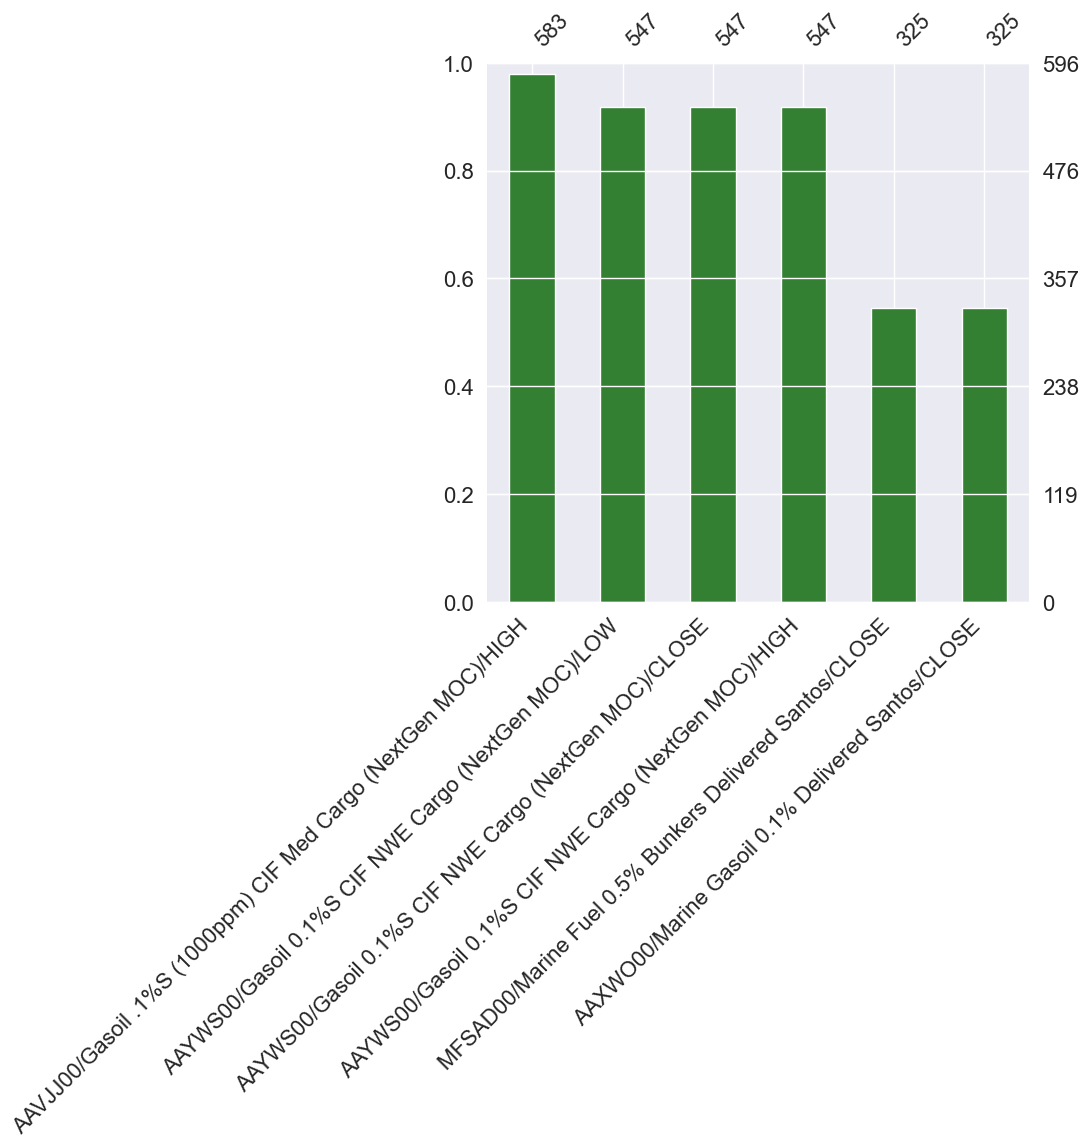

In [14]:
msno.bar(df = ts.iloc[:, -6:], figsize = (7, 7), color = (0.2, 0.5, 0.2))   # null 데이터의 위치 분포 확인 가능

In [18]:
for col in ts.columns:
    if col != 'Date':
        ts[col] = pd.to_numeric(ts[col], errors='coerce')
        
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 97 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   Date                                                             596 non-null    datetime64[ns]
 1   PPXDK00/FO 380 CST 3.5%S FOB Spore Cargo/CLOSE                   576 non-null    float64       
 2   PUABC00/FO 3.5%S FOB Rdam Barge/CLOSE                            579 non-null    float64       
 3   PUAFT00/Bunker FO 380 CST Dlvd Singapore/CLOSE                   576 non-null    float64       
 4   AALMZ00/Marine Gasoil 0.5% Dlvd Singapore/CLOSE                  576 non-null    float64       
 5   PUAFN00/Bunker FO 380 CST 3.5% Dlvd Rotterdam/CLOSE              579 non-null    float64       
 6   AAYWT00/Gasoil .1%S (1000ppm) FOB ARA Barge (NextGen MOC)/CLOSE  579 non-null    f

In [19]:
ts.iloc[:, 1:] = ts.iloc[:, 1:].interpolate(method='linear', limit_direction='forward', axis=0)
ts.head(50)

,Date,PPXDK00/FO 380 CST 3.5%S FOB Spore Cargo/CLOSE,PUABC00/FO 3.5%S FOB Rdam Barge/CLOSE,PUAFT00/Bunker FO 380 CST Dlvd Singapore/CLOSE,AALMZ00/Marine Gasoil 0.5% Dlvd Singapore/CLOSE,PUAFN00/Bunker FO 380 CST 3.5% Dlvd Rotterdam/CLOSE,AAYWT00/Gasoil .1%S (1000ppm) FOB ARA Barge (NextGen MOC)/CLOSE,AARTG00/Marine Gasoil 0.1% Dlvd Rotterdam/CLOSE,AARKD00/Bunker FO 380 CST Dlvd Shanghai/CLOSE,AARKE00/Marine Gasoil 0.5% Dlvd Shanghai/CLOSE,PUAFL00/Bunker FO 380 CST 3.5% Dlvd Piraeus/CLOSE,POADG00/Marine Gasoil 0.1% Dlvd Piraeus/CLOSE,PUAER00/Bunker FO 380 CST Dlvd Hong Kong/CLOSE,AAXYQ00/Low Sulfur Marine Gasoil 0.1% Dlvd Hong Kong/CLOSE,PUAFD00/Bunker FO 380 CST 3.5% Ex-Wharf Genoa/CLOSE,PBABK00/Marine Gasoil 0.1% Ex-Wharf Genoa/CLOSE,PUAGQ00/Bunker FO 380 CST Dlvd Busan/CLOSE,AARKJ00/Marine Gasoil 0.5% Dlvd Busan/CLOSE,AAMNV00/Bunker FO 380 CST 3.5% Dlvd Charleston/CLOSE,AAWWV00/Marine Gasoil 0.1% Dlvd Charleston/CLOSE,AAGPM00/Bunker FO 380 CST 3.5% Dlvd Los Angeles/CLOSE,AAWWY00/Marine Gasoil 0.1% Dlvd Los Angeles/CLOSE,PBAAP00/Bunker FO 380 CST 3.5% Ex-Wharf Los Angeles/CLOSE,AAWYR00/Marine Gasoil 0.1% Ex-Wharf Los Angeles/CLOSE,AAGPD00/Bunker FO 380 CST 3.5% Dlvd Houston/CLOSE,AAWWX00/Marine Gasoil 0.1% Dlvd Houston/CLOSE,AAGQN00/Bunker FO 380 CST 3.5% Dlvd New York/CLOSE,AAWYB00/Marine Gasoil 0.1% Dlvd New York/CLOSE,AAGQW00/Bunker FO 380 CST 3.5% Dlvd Norfolk/CLOSE,AAWYC00/Marine Gasoil 0.1% Dlvd Norfolk/CLOSE,AAXJR00/Bunker FO 380 CST 3.5% Ex-Wharf Savannah/CLOSE,AAWZF00/Marine Gasoil 0.1% Ex-Wharf Savannah/CLOSE,AAGSG00/Bunker FO 380 CST 3.5% Dlvd Seattle/CLOSE,AAWYL00/Marine Gasoil 0.1% Dlvd Seattle/CLOSE,AAKAB00/Bunker FO 380 CST 3.5% Dlvd Gibraltar/CLOSE,AARSU00/Marine Gasoil 0.1% Dlvd Gibraltar/CLOSE,PUAEV00/Bunker FO 380 CST Dlvd Japan/CLOSE,POACI00/Marine Diesel 0.5% Dlvd Japan/CLOSE,PBABW00/Marine Gasoil 0.1% Dlvd El Callao/CLOSE,PUAYR00/Bunker FO 380 CST 3.5% Dlvd Valparaiso/CLOSE,PBABX00/Marine Gasoil 0.1% Dlvd Valparaiso/CLOSE,PUBAD00/Bunker FO 380 CST 3.5% Ex-Wharf Balboa/CLOSE,AAXWI00/Marine Gasoil 0.1% Ex-Wharf Panama Canal/CLOSE,AARKK00/Marine Gasoil 0.5% Dlvd Colombo/CLOSE,AAWYU00/Marine Gasoil 0.1% Ex-Wharf New York/CLOSE,PUAFI00/Bunker FO 380 CST 3.5% Ex-Wharf New York/CLOSE,AAXYO00/Low Sulfur Marine Gasoil 0.1% Dlvd Singapore/CLOSE,AAXYR00/Low Sulfur Marine Gasoil 0.1% Dlvd Shanghai/CLOSE,AAXYS00/Low Sulfur Marine Gasoil 0.1% Dlvd South Korea/CLOSE,PUAEO00/Bunker FO 380 CST 3.5% Ex-Wharf French Med/CLOSE,POABX00/Marine Gasoil 0.1% Ex-Wharf French Med/CLOSE,PUAGX00/Bunker FO 180 CST 3.5% Dlvd Durban/CLOSE,PUAGY00/Marine Gasoil Dlvd Durban/CLOSE,AAXYT00/Low Sulfur Marine Diesel 0.1% Dlvd Tokyo Bay/CLOSE,PUAET00/Bunker FO 380 CST 3.5% Dlvd Istanbul/CLOSE,AAWZE00/Marine Gasoil 0.1% Ex-Wharf San Francisco/CLOSE,AARJZ00/Bunker FO 380 CST Dlvd West Japan/CLOSE,AAWYF00/Marine Gasoil 0.1% Dlvd San Francisco/CLOSE,POACF00/Marine Gasoil 0.1% Dlvd Istanbul/CLOSE,AAVUO00/Bunker FO 500 CST Dlvd Singapore/CLOSE,AARSH00/Marine Gasoil 0.1% Dlvd Algeciras/CLOSE,PUAEE00/Bunker FO 380 CST 3.5% Dlvd Antwerp/CLOSE,AARSI00/Marine Gasoil 0.1% Dlvd Antwerp/CLOSE,AAOVC00/Gasoil .001%S (10ppm) FOB Spore Cargo/CLOSE,ICLO001/ICE Gasoil Settlement Mo01/CLOSE,ICLO002/ICE Gasoil Settlement Mo02/CLOSE,AAXYP00/Low Sulfur Marine Gasoil 0.1% Dlvd Fujairah/CLOSE,PUABE00/FO 180 CST FOB Arab Gulf Cargo/CLOSE,PUAXP00/Bunker FO 380 CST Dlvd Fujairah/CLOSE,AARSZ00/Marine Gasoil 0.1% Dlvd Hamburg/CLOSE,AAVWC00/Marine Gasoil 0.1% Dlvd Gothenburg/CLOSE,AARTJ00/Marine Gasoil 0.1% Dlvd St Petersburg/CLOSE,MFFMM00/Marine Fuel 0.5% FOB Med Cargo $/mt/CLOSE,MFCMM00/Marine Fuel 0.5% CIF Med Cargo $/mt/CLOSE,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/LOW,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/CLOSE,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/HIGH,PBADH00/Marine Gasoil 0.1% Dlvd Malta/LOW,PBADH00/Marine Gasoil 0.1% Dlvd Malta/CLOSE,PBADH00/Marine Gasoil 0.1% Dlvd Malta/HIGH,PUAAZ00/FO 3.5%S FOB Med Cargo/LOW,PUAAZ00/FO 3.5%S FOB Med Cargo/CLOSE,PUAAZ00/

In [20]:
ts.isna().sum()

Date                                                                 0
PPXDK00/FO 380 CST 3.5%S FOB Spore Cargo/CLOSE                       0
PUABC00/FO 3.5%S FOB Rdam Barge/CLOSE                                1
PUAFT00/Bunker FO 380 CST Dlvd Singapore/CLOSE                       0
AALMZ00/Marine Gasoil 0.5% Dlvd Singapore/CLOSE                      0
PUAFN00/Bunker FO 380 CST 3.5% Dlvd Rotterdam/CLOSE                  1
AAYWT00/Gasoil .1%S (1000ppm) FOB ARA Barge (NextGen MOC)/CLOSE      1
AARTG00/Marine Gasoil 0.1% Dlvd Rotterdam/CLOSE                      1
AARKD00/Bunker FO 380 CST Dlvd Shanghai/CLOSE                        0
AARKE00/Marine Gasoil 0.5% Dlvd Shanghai/CLOSE                       0
PUAFL00/Bunker FO 380 CST 3.5% Dlvd Piraeus/CLOSE                    1
POADG00/Marine Gasoil 0.1% Dlvd Piraeus/CLOSE                        1
PUAER00/Bunker FO 380 CST Dlvd Hong Kong/CLOSE                       0
AAXYQ00/Low Sulfur Marine Gasoil 0.1% Dlvd Hong Kong/CLOSE           0
PUAFD0

In [22]:
ts.iloc[0] = ts.iloc[1].fillna(ts.iloc[0])
ts.head(10)

,Date,PPXDK00/FO 380 CST 3.5%S FOB Spore Cargo/CLOSE,PUABC00/FO 3.5%S FOB Rdam Barge/CLOSE,PUAFT00/Bunker FO 380 CST Dlvd Singapore/CLOSE,AALMZ00/Marine Gasoil 0.5% Dlvd Singapore/CLOSE,PUAFN00/Bunker FO 380 CST 3.5% Dlvd Rotterdam/CLOSE,AAYWT00/Gasoil .1%S (1000ppm) FOB ARA Barge (NextGen MOC)/CLOSE,AARTG00/Marine Gasoil 0.1% Dlvd Rotterdam/CLOSE,AARKD00/Bunker FO 380 CST Dlvd Shanghai/CLOSE,AARKE00/Marine Gasoil 0.5% Dlvd Shanghai/CLOSE,PUAFL00/Bunker FO 380 CST 3.5% Dlvd Piraeus/CLOSE,POADG00/Marine Gasoil 0.1% Dlvd Piraeus/CLOSE,PUAER00/Bunker FO 380 CST Dlvd Hong Kong/CLOSE,AAXYQ00/Low Sulfur Marine Gasoil 0.1% Dlvd Hong Kong/CLOSE,PUAFD00/Bunker FO 380 CST 3.5% Ex-Wharf Genoa/CLOSE,PBABK00/Marine Gasoil 0.1% Ex-Wharf Genoa/CLOSE,PUAGQ00/Bunker FO 380 CST Dlvd Busan/CLOSE,AARKJ00/Marine Gasoil 0.5% Dlvd Busan/CLOSE,AAMNV00/Bunker FO 380 CST 3.5% Dlvd Charleston/CLOSE,AAWWV00/Marine Gasoil 0.1% Dlvd Charleston/CLOSE,AAGPM00/Bunker FO 380 CST 3.5% Dlvd Los Angeles/CLOSE,AAWWY00/Marine Gasoil 0.1% Dlvd Los Angeles/CLOSE,PBAAP00/Bunker FO 380 CST 3.5% Ex-Wharf Los Angeles/CLOSE,AAWYR00/Marine Gasoil 0.1% Ex-Wharf Los Angeles/CLOSE,AAGPD00/Bunker FO 380 CST 3.5% Dlvd Houston/CLOSE,AAWWX00/Marine Gasoil 0.1% Dlvd Houston/CLOSE,AAGQN00/Bunker FO 380 CST 3.5% Dlvd New York/CLOSE,AAWYB00/Marine Gasoil 0.1% Dlvd New York/CLOSE,AAGQW00/Bunker FO 380 CST 3.5% Dlvd Norfolk/CLOSE,AAWYC00/Marine Gasoil 0.1% Dlvd Norfolk/CLOSE,AAXJR00/Bunker FO 380 CST 3.5% Ex-Wharf Savannah/CLOSE,AAWZF00/Marine Gasoil 0.1% Ex-Wharf Savannah/CLOSE,AAGSG00/Bunker FO 380 CST 3.5% Dlvd Seattle/CLOSE,AAWYL00/Marine Gasoil 0.1% Dlvd Seattle/CLOSE,AAKAB00/Bunker FO 380 CST 3.5% Dlvd Gibraltar/CLOSE,AARSU00/Marine Gasoil 0.1% Dlvd Gibraltar/CLOSE,PUAEV00/Bunker FO 380 CST Dlvd Japan/CLOSE,POACI00/Marine Diesel 0.5% Dlvd Japan/CLOSE,PBABW00/Marine Gasoil 0.1% Dlvd El Callao/CLOSE,PUAYR00/Bunker FO 380 CST 3.5% Dlvd Valparaiso/CLOSE,PBABX00/Marine Gasoil 0.1% Dlvd Valparaiso/CLOSE,PUBAD00/Bunker FO 380 CST 3.5% Ex-Wharf Balboa/CLOSE,AAXWI00/Marine Gasoil 0.1% Ex-Wharf Panama Canal/CLOSE,AARKK00/Marine Gasoil 0.5% Dlvd Colombo/CLOSE,AAWYU00/Marine Gasoil 0.1% Ex-Wharf New York/CLOSE,PUAFI00/Bunker FO 380 CST 3.5% Ex-Wharf New York/CLOSE,AAXYO00/Low Sulfur Marine Gasoil 0.1% Dlvd Singapore/CLOSE,AAXYR00/Low Sulfur Marine Gasoil 0.1% Dlvd Shanghai/CLOSE,AAXYS00/Low Sulfur Marine Gasoil 0.1% Dlvd South Korea/CLOSE,PUAEO00/Bunker FO 380 CST 3.5% Ex-Wharf French Med/CLOSE,POABX00/Marine Gasoil 0.1% Ex-Wharf French Med/CLOSE,PUAGX00/Bunker FO 180 CST 3.5% Dlvd Durban/CLOSE,PUAGY00/Marine Gasoil Dlvd Durban/CLOSE,AAXYT00/Low Sulfur Marine Diesel 0.1% Dlvd Tokyo Bay/CLOSE,PUAET00/Bunker FO 380 CST 3.5% Dlvd Istanbul/CLOSE,AAWZE00/Marine Gasoil 0.1% Ex-Wharf San Francisco/CLOSE,AARJZ00/Bunker FO 380 CST Dlvd West Japan/CLOSE,AAWYF00/Marine Gasoil 0.1% Dlvd San Francisco/CLOSE,POACF00/Marine Gasoil 0.1% Dlvd Istanbul/CLOSE,AAVUO00/Bunker FO 500 CST Dlvd Singapore/CLOSE,AARSH00/Marine Gasoil 0.1% Dlvd Algeciras/CLOSE,PUAEE00/Bunker FO 380 CST 3.5% Dlvd Antwerp/CLOSE,AARSI00/Marine Gasoil 0.1% Dlvd Antwerp/CLOSE,AAOVC00/Gasoil .001%S (10ppm) FOB Spore Cargo/CLOSE,ICLO001/ICE Gasoil Settlement Mo01/CLOSE,ICLO002/ICE Gasoil Settlement Mo02/CLOSE,AAXYP00/Low Sulfur Marine Gasoil 0.1% Dlvd Fujairah/CLOSE,PUABE00/FO 180 CST FOB Arab Gulf Cargo/CLOSE,PUAXP00/Bunker FO 380 CST Dlvd Fujairah/CLOSE,AARSZ00/Marine Gasoil 0.1% Dlvd Hamburg/CLOSE,AAVWC00/Marine Gasoil 0.1% Dlvd Gothenburg/CLOSE,AARTJ00/Marine Gasoil 0.1% Dlvd St Petersburg/CLOSE,MFFMM00/Marine Fuel 0.5% FOB Med Cargo $/mt/CLOSE,MFCMM00/Marine Fuel 0.5% CIF Med Cargo $/mt/CLOSE,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/LOW,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/CLOSE,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/HIGH,PBADH00/Marine Gasoil 0.1% Dlvd Malta/LOW,PBADH00/Marine Gasoil 0.1% Dlvd Malta/CLOSE,PBADH00/Marine Gasoil 0.1% Dlvd Malta/HIGH,PUAAZ00/FO 3.5%S FOB Med Cargo/LOW,PUAAZ00/FO 3.5%S FOB Med Cargo/CLOSE,PUAAZ00/

In [23]:
ts.isna().sum()

Date                                                                 0
PPXDK00/FO 380 CST 3.5%S FOB Spore Cargo/CLOSE                       0
PUABC00/FO 3.5%S FOB Rdam Barge/CLOSE                                0
PUAFT00/Bunker FO 380 CST Dlvd Singapore/CLOSE                       0
AALMZ00/Marine Gasoil 0.5% Dlvd Singapore/CLOSE                      0
PUAFN00/Bunker FO 380 CST 3.5% Dlvd Rotterdam/CLOSE                  0
AAYWT00/Gasoil .1%S (1000ppm) FOB ARA Barge (NextGen MOC)/CLOSE      0
AARTG00/Marine Gasoil 0.1% Dlvd Rotterdam/CLOSE                      0
AARKD00/Bunker FO 380 CST Dlvd Shanghai/CLOSE                        0
AARKE00/Marine Gasoil 0.5% Dlvd Shanghai/CLOSE                       0
PUAFL00/Bunker FO 380 CST 3.5% Dlvd Piraeus/CLOSE                    0
POADG00/Marine Gasoil 0.1% Dlvd Piraeus/CLOSE                        0
PUAER00/Bunker FO 380 CST Dlvd Hong Kong/CLOSE                       0
AAXYQ00/Low Sulfur Marine Gasoil 0.1% Dlvd Hong Kong/CLOSE           0
PUAFD0

In [24]:
ts.to_csv('./ts_prepro_wo_NLP.csv', index=False)

In [26]:
260/596 * 100

43.624161073825505